# **Machine Learning Project**

## **Employee Turnover Analytics**

### **Problem Statement**

Portobello Tech is an app innovator who has devised an intelligent way of
predicting employee turnover within the company. It periodically evaluates
employees' work details, including the number of projects they worked on,
average monthly working hours, time spent in the company, promotions in the
last five years, and salary level.

Data from prior evaluations shows the employees’ satisfaction in the workplace.
The data could be used to identify patterns in work style and their interest in
continuing to work for the company.
The HR Department owns the data and uses it to predict employee turnover.
Employee turnover refers to the total number of workers who leave a company
over time.

### **Project Request**

As the ML Developer assigned to the HR Department, you have been asked to
create ML programs to:

1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation metrics used.
7. Suggest various retention strategies for targeted employees.


## **Import Packages and Libraries**

In [2]:
!pip install lightgbm
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Ignore all warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


### **Ingest Data**
Use pandas to read the csv file for further data exploration.

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

### **Data Analysis**
Explore features and target variables.

Analyse data structure, types and distributions.

Identify relationships and patterns.

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(14999, 10)

In [8]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


### **Data Preprocessing**

**Cleaning** - Handle missing values, outliers and duplicates.

**Transformation** - Encode categorical variables and normalize/scale numerical features

**Feature Engineering** - Create new features and remove irrelevant or redundant features.

**Splitting** - Divide the data into training and testing sets (80-20)

In [9]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


The result show that our dataset has no missing values

In [10]:
print((df == '').sum())

# Check for specific placeholders like -1 or 999
print((df == -1).sum())
print((df == 999).sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


Used a different method to inspect for missing values that may be disguised as empty string and any possible placeholders. And the results still show that the dataset has no missing values

In [11]:
duplicates = df.duplicated()

duplicate_count = duplicates.sum()

print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 3008
Duplicate rows:
       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0  

Results show that there are 3008 rows that are duplicated. This is not a flag because it means that different employees have entered the same ratings because of similar experiences in the same company.

In [12]:
df_copy = df.copy()
# Compute the correlation matrix
correlation_matrix = df_copy.corr()

# Display the correlation matrix
print(correlation_matrix)


                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

/tmp/ipykernel_534/359505973.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


Correlation Value = 0
No Linear Correlation: A value of 0 means there is no linear relationship between the two variables. Changes in one variable do not predict changes in the other in a linear fashion.

Results show:

No correlation in the dataset that is equal to 0.

Correlation Value Between 0 and 1 (0 < r < 1)
Positive Correlation: Values between 0 and 1 indicate a positive correlation. As one variable increases, the other tends to increase as well, but not in a perfect linear manner.

Results show:

Last evalulation and level of satisfaction is 0.105

Correlation Value Between -1 and 0 (-1 < r < 0)
Negative Correlation: Values between -1 and 0 indicate a negative correlation. As one variable increases, the other tends to decrease, but again, not in a perfectly inverse manner.

Result show:

level of satisfaction and number of projects is -0.143

left and level of satisfaction is -0.388

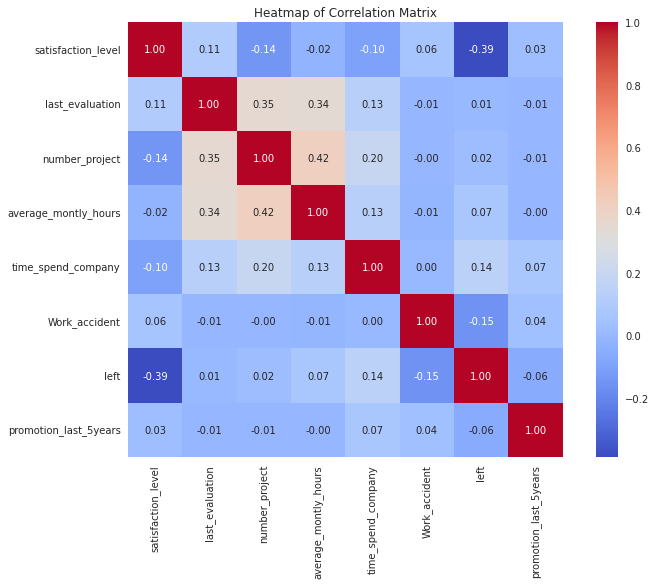

In [13]:
# Set font family to DejaVu Sans (default font bundled with Matplotlib)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Heatmap of Correlation Matrix")

plt.show()

#### **Employee Satisfaction**

Text(0, 0.5, 'Frequency')

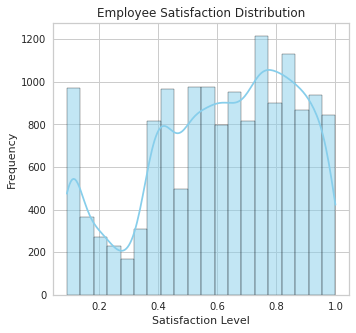

In [14]:
plt.figure(figsize=(18, 5))

# Subplot 1: Employee Satisfaction (satisfaction_level)
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], kde=True, color='skyblue', bins=20)
plt.title('Employee Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

#### **Employee Evaluation**

Text(0, 0.5, 'Frequency')

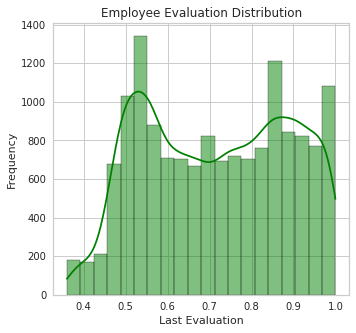

In [15]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.histplot(df['last_evaluation'], kde=True, color='green', bins=20)
plt.title('Employee Evaluation Distribution')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')

**Employee Average Monthly Hours Distribution**

Text(0, 0.5, 'Frequency')

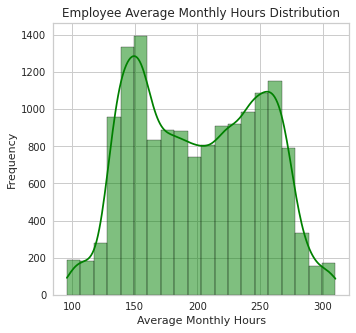

In [16]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.histplot(df['average_montly_hours'], kde=True, color='green', bins=20)
plt.title('Employee Average Monthly Hours Distribution')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

**Employee Salary Distribution**

Text(0, 0.5, 'Frequency')

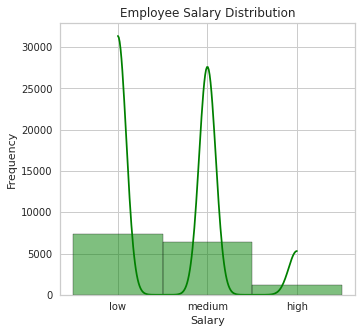

In [17]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.histplot(df['salary'], kde=True, color='green', bins=20)
plt.title('Employee Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

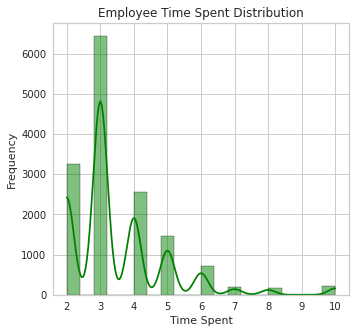

In [18]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.histplot(df['time_spend_company'], kde=True, color='green', bins=20)
plt.title('Employee Time Spent Distribution')
plt.xlabel('Time Spent')
plt.ylabel('Frequency')

In [133]:
def check_outliers(df_copy, column):
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {outliers.shape[0]}\n")
    
    return outliers

# Check for outliers in each column
for col in ['satisfaction_level', 'last_evaluation', 'average_montly_hours']:
    check_outliers(df_copy, col)


Column: satisfaction_level
Lower Bound: -0.12999999999999995, Upper Bound: 1.39
Number of Outliers: 0

Column: last_evaluation
Lower Bound: 0.09500000000000014, Upper Bound: 1.335
Number of Outliers: 0

Column: average_montly_hours
Lower Bound: 22.5, Upper Bound: 378.5
Number of Outliers: 0



**Employee Project Count: Stayed vs Left**

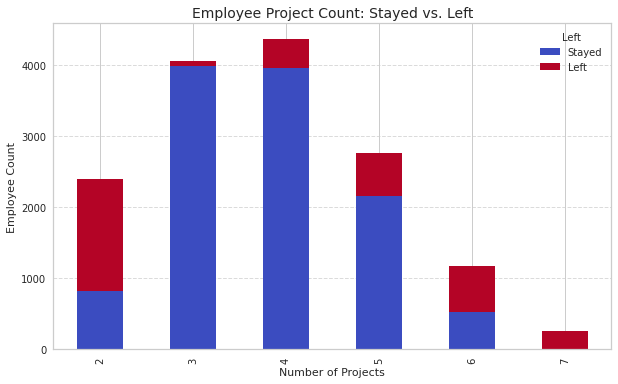

In [134]:
# Group the data
project_counts = df.groupby(['number_project', 'left']).size().unstack()

project_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Employee Project Count: Stayed vs. Left', fontsize=14)
plt.xlabel('Number of Projects')
plt.ylabel('Employee Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


The results show:

More people left when they had two projects, followed by those with six projects. Those that had 7 projets did not stay, all of them left.
Employess with 3 projects has the least number of people that left the company.


**Employee Clustering based on satisfaction level as reason to leave**

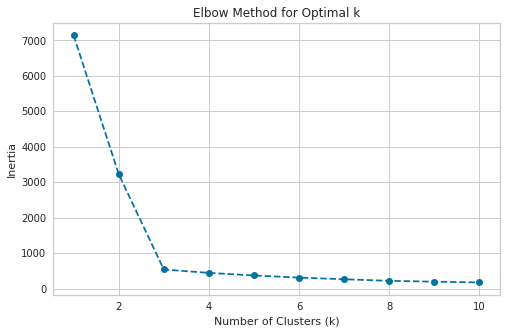

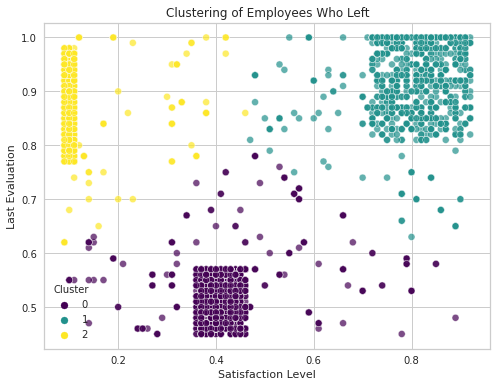

In [135]:
# Filter employees who left
left_employees = df_copy[df_copy['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Step 2: Scale the data for better clustering
scaler = StandardScaler()
left_scaled = scaler.fit_transform(left_employees)

# Step 3: Determine optimal clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(left_scaled)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the Elbow Method to determine the best 'k'
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 5: Fit K-Means with the chosen k (let's assume 3 based on elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
left_employees['Cluster'] = kmeans.fit_predict(left_scaled)

# Step 6: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=left_employees['satisfaction_level'], 
                y=left_employees['last_evaluation'], 
                hue=left_employees['Cluster'], 
                palette='viridis', alpha=0.7)

plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The clustering reveal patterns like:

Cluster 0: Employees with low satisfaction but low evaluation → Maybe unhappy or disengaged workers and unrecognized.

Cluster 1: Employees with high satisfaction & high evaluation → Happy and recognised employees.

Cluster 2: Employees with low satisfaction & high evaluation →  Maybe they are overworked.

In [136]:
df_copy1 = df.copy()

categorical_cols = df_copy1.select_dtypes(include=['object']).columns
numerical_cols = df_copy1.select_dtypes(exclude=['object']).columns

# Convert categorical variables using one-hot encoding
data_encoded = pd.get_dummies(df_copy1, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
X = data_encoded.drop(columns=['left'])  # Features
y = data_encoded['left']  # Target variable (1 = Left, 0 = Stayed)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)


In [138]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [139]:
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Before SMOTE:
0    9142
1    2857
Name: left, dtype: int64

After SMOTE:
0    9142
1    9142
Name: left, dtype: int64


When dealing with imbalanced datasets (e.g., more employees staying than leaving), machine learning models may become biased toward the majority class.
SMOTE generates new synthetic samples for the minority class, improving model performance and fairness.

Seeing from the above results, we see that before we performed SMOTE we saw the imbalance in the data and then after performing SMOTE we have a balanced dataset with bias to Majority being the number of employees who stayed.

### **Model Training**

In [140]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=123)

log_reg_cv_scores = cross_val_score(log_reg, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
log_reg_preds = cross_val_predict(log_reg, X_train_smote, y_train_smote, cv=cv)

print("Logistic Regression Accuracy:", np.mean(log_reg_cv_scores))
print("\nClassification Report:\n", classification_report(y_train_smote, log_reg_preds))


**Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)

rf_cv_scores = cross_val_score(rf, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
rf_preds = cross_val_predict(rf, X_train_smote, y_train_smote, cv=cv)

print("Random Forest Accuracy:", np.mean(rf_cv_scores))
print("\nClassification Report:\n", classification_report(y_train_smote, rf_preds))


**Gradient Boosting Classifier**

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123)

gb_cv_scores = cross_val_score(gb, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
gb_preds = cross_val_predict(gb, X_train_smote, y_train_smote, cv=cv)

print("Gradient Boosting Accuracy:", np.mean(gb_cv_scores))
print("\nClassification Report:\n", classification_report(y_train_smote, gb_preds))


**Model Comparison**

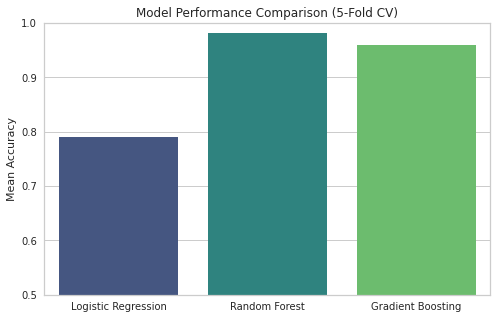

In [117]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [np.mean(log_reg_cv_scores), np.mean(rf_cv_scores), np.mean(gb_cv_scores)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylabel("Mean Accuracy")
plt.title("Model Performance Comparison (5-Fold CV)")
plt.ylim(0.5, 1.0)
plt.show()


Through comparing the models we can clearly see that the best performing Model the Random Forest Classifier with an average f1-score of 0.98

Followed by the Gradient Boosting Classifier with an average f1-score of 0.96

And lastly is Logistic Regression with an average f1-score of 0.78

### **Model Selection**

In [146]:
# Train the models first
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Compute probabilities
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]

# Compute AUC scores
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

print(f"Logistic Regression AUC: {log_reg_auc:.2f}")
print(f"Random Forest AUC: {rf_auc:.2f}")
print(f"Gradient Boosting AUC: {gb_auc:.2f}")

Logistic Regression AUC: 0.82
Random Forest AUC: 1.00
Gradient Boosting AUC: 0.99


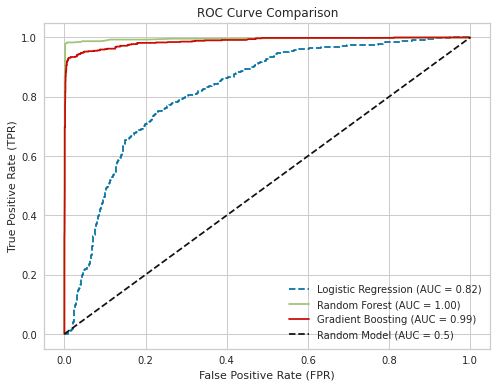

In [147]:
# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

# Reference line (random model)
plt.plot([0, 1], [0, 1], 'k--', label='Random Model (AUC = 0.5)')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


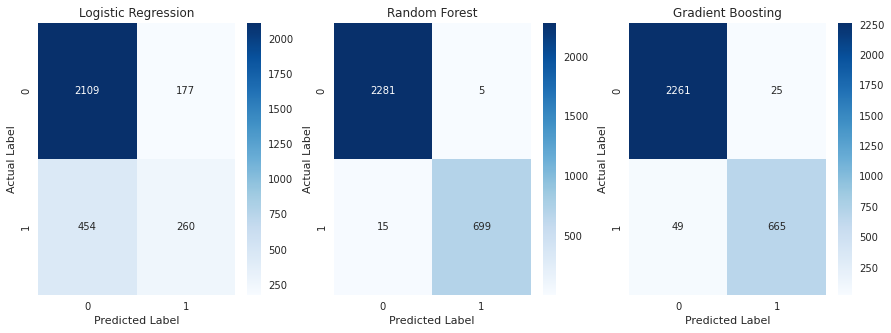

In [148]:
# Predict class labels
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf.predict(X_test)
gb_preds = gb.predict(X_test)

# Compute confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, cm, title in zip(axes, [log_reg_cm, rf_cm, gb_cm], 
                         ["Logistic Regression", "Random Forest", "Gradient Boosting"]):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")

plt.show()


In [149]:
# Compute Precision & Recall
log_reg_precision = precision_score(y_test, log_reg_preds)
rf_precision = precision_score(y_test, rf_preds)
gb_precision = precision_score(y_test, gb_preds)

log_reg_recall = recall_score(y_test, log_reg_preds)
rf_recall = recall_score(y_test, rf_preds)
gb_recall = recall_score(y_test, gb_preds)

# Print results
print(f"Logistic Regression - Precision: {log_reg_precision:.2f}, Recall: {log_reg_recall:.2f}")
print(f"Random Forest - Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}")
print(f"Gradient Boosting - Precision: {gb_precision:.2f}, Recall: {gb_recall:.2f}")


Logistic Regression - Precision: 0.59, Recall: 0.36
Random Forest - Precision: 0.99, Recall: 0.98
Gradient Boosting - Precision: 0.96, Recall: 0.93


Best AUC from ROC Curve → Random Forest Classifier (RFC)

Best confusion matrix (low FN & FP) →  Random Forest Classifier (RFC)

Best balance of Precision & Recall →  Random Forest Classifier (RFC)

Final Choice:  Random Forest Classifier (RFC) is the best model. 

### **Model Evaluation**

In [152]:
# Predict probability of employee turnover using the best model
rf_probs = rf.predict_proba(X_test)[:, 1]

# Convert probabilities into a DataFrame for easy categorization
test_results = pd.DataFrame({'Employee_ID': X_test.index, 'Turnover_Probability': rf_probs})

# Define function to categorize employees based on probability scores
def categorize_employee(prob):
    if prob < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= prob < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= prob < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Apply the categorization
test_results['Risk_Zone'] = test_results['Turnover_Probability'].apply(categorize_employee)

# Display categorized employees
test_results.head()


,Employee_ID,Turnover_Probability,Risk_Zone
0,10627,0.00,Safe Zone (Green)
1,2703,0.45,Low-Risk Zone (Yellow)
2,6059,0.00,Safe Zone (Green)
3,3258,0.00,Safe Zone (Green)
4,4565,0.00,Safe Zone (Green)


In [153]:
test_results.tail()

,Employee_ID,Turnover_Probability,Risk_Zone
2995,4961,0.00,Safe Zone (Green)
2996,4557,0.05,Safe Zone (Green)
2997,6610,0.01,Safe Zone (Green)
2998,10327,0.02,Safe Zone (Green)
2999,731,0.99,High-Risk Zone (Red)


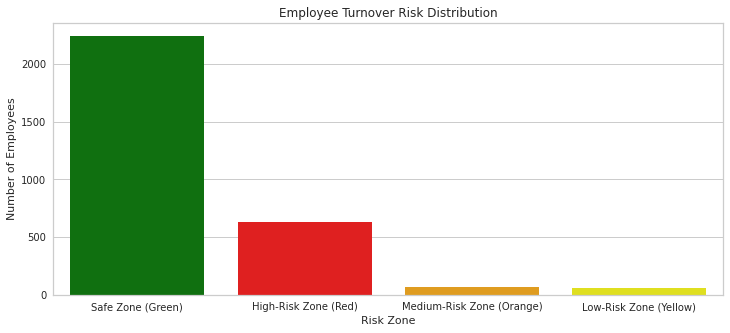

In [157]:
risk_counts = test_results['Risk_Zone'].value_counts()

# Plot the risk distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=['green', 'red', 'orange', 'yellow'])
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.title('Employee Turnover Risk Distribution')
plt.show()

The visual shows a count of more than 500 employees that are high risk and over 2000 employees that are on the safe zone

Safe Zone (Green)	< 20%	 No Immediate Action Needed: Employees in this category are highly satisfied and engaged. 

Retention Strategy: Maintain current policies and continue providing career growth opportunities.

Low-Risk Zone (Yellow)	20% - 60%	 Monitor & Engage: Conduct regular check-ins, offer mentorship, and ensure that employees feel valued through recognition programs.

Medium-Risk Zone (Orange)	60% - 90%	 Proactive Intervention Needed: Employees in this group may be disengaged due to work stress, lack of promotions, or dissatisfaction. 

Retention Strategy: Implement targeted surveys, improve work-life balance, and provide career advancement opportunities.

High-Risk Zone (Red)	> 90%	 Critical Retention Efforts Required: These employees are very likely to leave.

Retention Strategy: Conduct one-on-one discussions, offer salary adjustments, promotions, flexible work arrangements, or other retention incentives to address their concerns.

### **Conclusion**

**Key Findings**

Employee Turnover Factors

The analysis revealed that employee satisfaction and last evaluation scores are strong indicators of turnover. Employees with low satisfaction levels and high last evaluation scores were more likely to leave.
Workload balance plays a crucial role. Employees with too few or too many projects exhibited higher turnover rates.

Average monthly working hours showed a nonlinear trend—employees working too many or too few hours were more likely to leave.
Employees with lower salary levels had higher turnover rates.


Clustering Insights

Using clustering techniques, we identified distinct groups of employees based on satisfaction and evaluation scores. 
Employees in the high evaluation but low satisfaction cluster had the highest turnover rates.


Model Performance & Employee Risk Categorization

Random Forest and Gradient Boosting models outperformed Logistic Regression in predicting employee turnover.
SMOTE (Synthetic Minority Over-sampling Technique) helped balance the dataset, improving model performance.
The best model was used to predict employee turnover risk, classifying employees into Safe, Low-Risk, Medium-Risk, and High-Risk zones.

Retention Strategy Recommendations

Safe Zone (Green - <20%): Maintain employee engagement through continuous recognition and development opportunities.
Low-Risk Zone (Yellow - 20%-60%): Implement career progression plans and increase manager-employee engagement.
Medium-Risk Zone (Orange - 60%-90%): Address workload balance issues, introduce flexible work arrangements, and improve employee well-being initiatives.
High-Risk Zone (Red - >90%): Immediate retention actions needed, including salary adjustments, promotions, and personalized discussions.


This analysis provided valuable insights into the key drivers of employee turnover and enabled a data-driven approach to employee retention strategies. By leveraging predictive analytics, HR teams can take proactive measures to improve employee satisfaction, reduce turnover, and optimize workforce planning. Future work could explore real-time monitoring dashboards and sentiment analysis from employee feedback to further enhance predictions and interventions.